## Modeling and Experiments

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier


In [2]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_and_processed_data.csv')
df.head()

mean_consumption  std_consumption  sum_consumption  median_consumption  \
0          0.947796         3.101514       976.230000              0.0000   
1          4.348694         6.844979      4479.155000              0.9875   
2          6.304235         9.416844      6493.361667              2.3900   
3          4.215524        10.180330      4341.990000              0.0000   
4         25.436659        48.695929     26199.758333              3.3875   

   max_consumption  min_consumption  count_valid_days  mean_daily_diff  lag_1  \
0            18.29              0.0              1030         0.223178   0.70   
1            44.57              0.0              1030         0.833226  13.94   
2            79.71              0.0              1030         2.723158   1.88   
3           106.22              0.0              1030         0.892057  17.51   
4           399.40              0.0              1030         5.629142   1.16   

    lag_7  ...  monthly_avg_2016_05  monthly_avg_2016_06  monthly_avg_2016_07  \
0   0.020  ...             0.000000             0.000000             0.024839   
1  17.130  ...             9.023871            16.486000            17.684194   
2  19.055  ...             6.205161            12.153000            15.704839   
3  20.980  ...            11.026129            22.380167            29.692258   
4   0.610  ...            66.410000           115.974000           147.117742   

   monthly_avg_2016_08  monthly_avg_2016_09  monthly_avg_2016_10  \
0             0.108065             0.088621             0.349355   
1            14.475484            22.908103            16.703871   
2            14.458710             7.842816            13.315323   
3            28.463065            17.122874            16.666452   
4           142.962903            12.208276             1.896022   

   num_z_outliers  mean_rolling_deviation  num_iqr_outliers  FLAG  
0              47                0.248229               168     1  
1              14                0.978513               149     1  
2              22                3.367538                36     1  
3              16                1.049050               236     1  
4              18                6.240874               127     1  

[5 rows x 48 columns]

In [3]:
# Drop rows with missing target
df = df.dropna(subset=['FLAG'])

# Separate X and y
X = df.drop(columns=['FLAG'])
y = df['FLAG']

# Fill missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for importances and sort descending
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select top N features (e.g., top 20)
top_features = feat_imp_df['feature'].head(20).tolist()

print("Top features:", top_features)

# Create a new DataFrame with only the top features and the target column
df_selected = pd.concat([X_imputed[top_features], y.reset_index(drop=True)], axis=1)

# Save the selected features and target to a new CSV file
# df_selected.to_csv('/data/features/selected_features.csv', index=False)

print("Saved selected top features to 'selected_features.csv'")


Top features: ['monthly_avg_2014_01', 'std_consumption', 'mean_daily_diff', 'mean_rolling_deviation', 'monthly_avg_2014_02', 'monthly_avg_2014_03', 'mean_consumption', 'max_consumption', 'num_z_outliers', 'sum_consumption', 'monthly_avg_2016_10', 'lag_1', 'monthly_avg_2014_05', 'monthly_avg_2014_04', 'monthly_avg_2014_06', 'monthly_avg_2016_03', 'monthly_avg_2016_04', 'monthly_avg_2016_09', 'monthly_avg_2016_01', 'monthly_avg_2014_10']
Saved selected top features to 'selected_features.csv'


In [4]:
# Load selected top features data
df = pd.read_csv('../data/features/selected_features.csv')
df.head()

monthly_avg_2014_01  std_consumption  mean_daily_diff  \
0             0.000323         3.101514         0.223178   
1             0.000000         6.844979         0.833226   
2             4.358065         9.416844         2.723158   
3             0.000000        10.180330         0.892057   
4             0.000000        48.695929         5.629142   

   mean_rolling_deviation  monthly_avg_2014_02  monthly_avg_2014_03  \
0                0.248229             0.000000             0.000000   
1                0.978513             0.000000             0.262903   
2                3.367538             6.711071             3.029839   
3                1.049050             0.000000             0.000000   
4                6.240874            88.619702             3.542419   

   mean_consumption  max_consumption  num_z_outliers  sum_consumption  ...  \
0          0.947796            18.29            47.0       976.230000  ...   
1          4.348694            44.57            14.0      4479.155000  ...   
2          6.304235            79.71            22.0      6493.361667  ...   
3          4.215524           106.22            16.0      4341.990000  ...   
4         25.436659           399.40            18.0     26199.758333  ...   

   lag_1  monthly_avg_2014_05  monthly_avg_2014_04  monthly_avg_2014_06  \
0   0.70             0.000000             0.000000             0.000000   
1  13.94             0.426452             1.121897             0.768333   
2   1.88             6.938710             6.859828             4.230500   
3  17.51             0.000000             0.000000             0.000000   
4   1.16             3.158118             3.390172             2.483000   

   monthly_avg_2016_03  monthly_avg_2016_04  monthly_avg_2016_09  \
0             0.000000             0.000000             0.088621   
1             5.260323             5.269667            22.908103   
2             1.456129             1.958000             7.842816   
3             5.970000             9.948667            17.122874   
4            51.074839            48.279333            12.208276   

   monthly_avg_2016_01  monthly_avg_2014_10  FLAG  
0             0.000000            10.046667     1  
1             4.564194             0.610667     1  
2             1.931613             3.137333     1  
3             0.000000             0.000000     1  
4            60.773871             2.839000     1  

[5 rows x 21 columns]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best hyperparameters found:
{'subsample': 0.8, 'scale_pos_weight': np.float64(10.720954356846473), 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best threshold by F1 score: 0.569


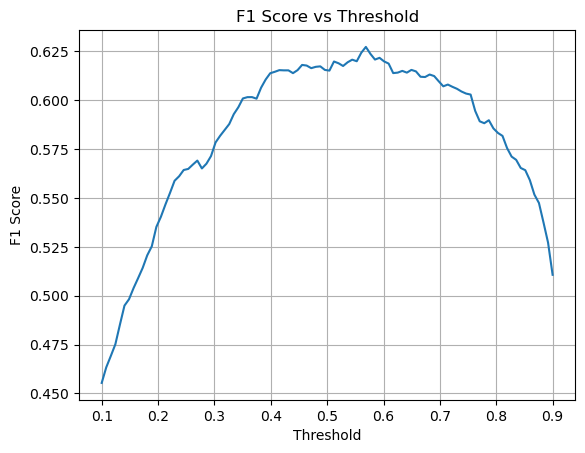

Confusion Matrix:
[[7604  148]
 [ 325  398]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7752
           1       0.73      0.55      0.63       723

    accuracy                           0.94      8475
   macro avg       0.84      0.77      0.80      8475
weighted avg       0.94      0.94      0.94      8475



In [5]:
# Drop rows with missing target
df = df.dropna(subset=["FLAG"])

# Separate features and target
X = df.drop(columns=["FLAG"])
y = df["FLAG"]

# Fill missing values in features
X = X.fillna(0)

# Optional: scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define the XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'scale_pos_weight': [1, np.sum(y_train==0) / np.sum(y_train==1)]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run hyperparameter tuning
random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Predict probabilities on test set
y_probs = best_model.predict_proba(X_test)[:, 1]

# Find best threshold based on F1 score
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = [f1_score(y_test, (y_probs > t).astype(int)) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold by F1 score: {best_threshold:.3f}")

# Plot F1 vs threshold
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()

# Use best threshold to predict labels
y_pred = (y_probs > best_threshold).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
